# Predicting Fire alarm Trigger using Smoke Detection Dataset

#### Importing Required libraries

In [541]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import sklearn.metrics as skm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

#Ignore warnings
import warnings
warnings.simplefilter('ignore')

#Formatting output data
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_colwidth', None)

#### Data Exploration

In [542]:
# Reading the file
smoke = pd.read_csv('smokedata.csv')

In [543]:
# Previewing the data
smoke.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.0000,57.3600,0,400,12306,18520,939.7350,0.0000,0.0000,0.0000,0.0000,0.0000,0,0
1,1,1654733332,20.0150,56.6700,0,400,12345,18651,939.7440,0.0000,0.0000,0.0000,0.0000,0.0000,1,0
2,2,1654733333,20.0290,55.9600,0,400,12374,18764,939.7380,0.0000,0.0000,0.0000,0.0000,0.0000,2,0
3,3,1654733334,20.0440,55.2800,0,400,12390,18849,939.7360,0.0000,0.0000,0.0000,0.0000,0.0000,3,0
4,4,1654733335,20.0590,54.6900,0,400,12403,18921,939.7440,0.0000,0.0000,0.0000,0.0000,0.0000,4,0


In [544]:
# Number of varaibles and Observations
smoke.shape

(62630, 16)

In [545]:
# Structure of the data
smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [546]:
# Checking for null values in the data
smoke.isna().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [547]:
smoke.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.0000,62630.0000,62630.0000,62630.0000,62630.0000,62630.0000,62630.0000,62630.0000,62630.0000,62630.0000,62630.0000,62630.0000,62630.0000,62630.0000,62630.0000,62630.0000
mean,31314.5000,1654792066.1843,15.9704,48.5395,1942.0575,670.0210,12942.4539,19754.2579,938.6276,100.5943,184.4678,491.4636,203.5865,80.0490,10511.3862,0.7146
std,18079.8680,110002.4881,14.3596,8.8654,7811.5891,1905.8854,272.4643,609.5132,1.3313,922.5242,1976.3056,4265.6613,2214.7386,1083.3832,7597.8710,0.4516
min,0.0000,1654712187.0000,-22.0100,10.7400,0.0000,400.0000,10668.0000,15317.0000,930.8520,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,15657.2500,1654743244.2500,10.9943,47.5300,130.0000,400.0000,12830.0000,19435.0000,938.7000,1.2800,1.3400,8.8200,1.3840,0.0330,3625.2500,0.0000
50%,31314.5000,1654761919.5000,20.1300,50.1500,981.0000,400.0000,12924.0000,19501.0000,938.8160,1.8100,1.8800,12.4500,1.9430,0.0440,9336.0000,1.0000
75%,46971.7500,1654777576.7500,25.4095,53.2400,1189.0000,438.0000,13109.0000,20078.0000,939.4180,2.0900,2.1800,14.4200,2.2490,0.0510,17164.7500,1.0000
max,62629.0000,1655130051.0000,59.9300,75.2000,60000.0000,60000.0000,13803.0000,21410.0000,939.8610,14333.6900,45432.2600,61482.0300,51914.6800,30026.4380,24993.0000,1.0000


In [548]:
#Checking duplicate rows
smoke.duplicated().value_counts()

False    62630
dtype: int64

There 62630 observations  with 16 variables . All columns are either Int or Float . There are no null values in  the data and there are no duplicate records as well .   


There are some columns which we can drop in the data . 
* UTC - This column tells us the time which data point is recorded , which has no effect on the response variable
* Unnamed: 0 , CNT - These are index columns , so we can remove these as well  


Temperature, PM , NC values are on different scales . We need to scale the data when we are modelling

In [549]:
smoke.drop('Unnamed: 0',axis=1,inplace=True)
smoke.drop('CNT',axis=1,inplace=True)
smoke.drop('UTC',axis=1,inplace=True)

 #### Exploratory Data Analysis

In [550]:
smoke['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

<AxesSubplot:xlabel='Fire Alarm', ylabel='Count'>

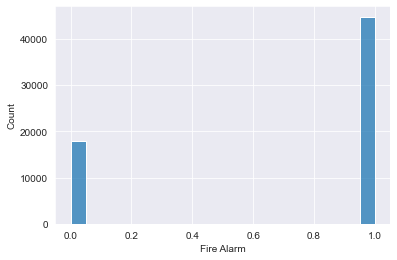

In [601]:
sns.set_style("darkgrid")
sns.histplot(smoke['Fire Alarm'])

In the data , there are 44k observations where a fire alarm is trigerred and 18k observations where it does not . 

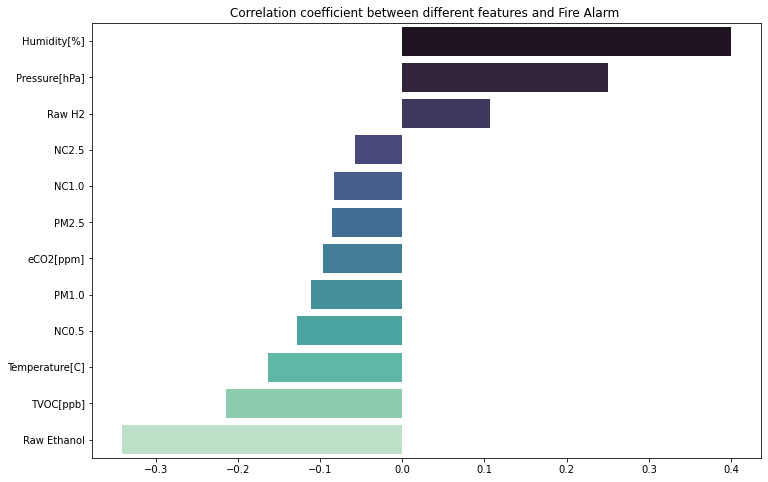

In [551]:
# Cheking the correlation of predictors with response varible
plt.figure(figsize=(12,8))
corr_response = smoke.corr()["Fire Alarm"].sort_values(ascending=False)
indices = corr_response.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(corr_response[i])
sns.barplot(x=corr, y=labels, palette='mako')
plt.title('Correlation coefficient between different features and Fire Alarm ')
plt.show()

Humidity and Pressure are having high positive correalation with the response . Raw Ethanol and TVOC are having high negative correaltion

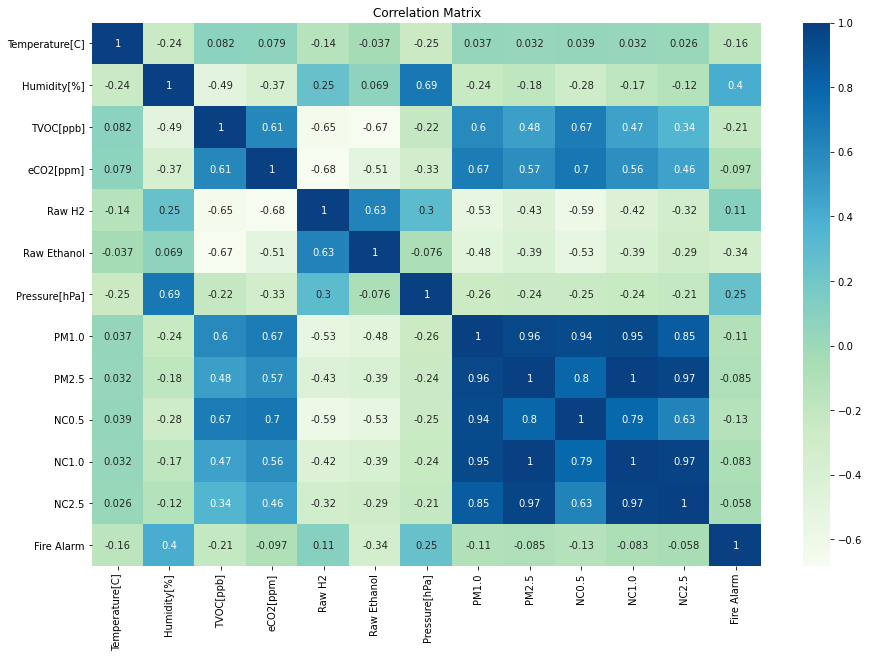

In [552]:
# Correlation Matrix
plt.figure(figsize = (15,10))
corr_all = smoke.corr()
cormatrix = sns.heatmap(corr_all, annot=True, cmap='GnBu')
cormatrix.set_title('Correlation Matrix')
plt.show()

From the Correlation matrix we could see all PM and NC values are very highly correlated . Humidity and Pressure are moderately correlated as well.

#### Modelling

In [553]:
# Funtion for plotting confusion matrix
def pcm(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm, 
                               columns = ['Predicted: No Alarm', 'Predicted: Alarm'], 
                               index = ['Actual: No Alarm', 'Actual: Alarm'])
    sns.heatmap(conf_matrix, annot = True, cbar = False, fmt = 'd',cmap='GnBu')
    plt.xticks()
    plt.yticks()
    plt.title(model_name + " Confusion Matrix")
    plt.show()

In [622]:
## Function to store scores of different models
scores = pd.DataFrame(columns = ['Model', 'Accuracy Score', 'NoAlarm Accuracy', 'Alarm Accuracy', 'Complexity Parameter'])
index_iter = iter(range(1, 10))
def storescore(y_test, y_pred, model_name,cp):
    global scores
    cm=confusion_matrix(y_test, y_pred)
#     print(cm)
    new_score = pd.DataFrame({'Model': model_name,
                              'Accuracy Score':metrics.accuracy_score(y_test, y_pred),
                              'NoAlarm Accuracy': round(cm[0][0]/(cm[0][0]+cm[0][1]),5), 
                              'Alarm Accuracy': round(cm[1][1]/(cm[1][0]+cm[1][1]),5),
                              'Complexity Parameter': cp}, 
                             index = [next(index_iter)])
    scores = pd.concat([scores, new_score])
    return scores

In [555]:
y = smoke['Fire Alarm']
x = smoke.drop('Fire Alarm', axis = 1)

In [556]:
# Splitting the data into training and testing . Here we are dividing 75% of data into training and remaining as testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 420)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((46972, 12), (15658, 12), (46972,), (15658,))

#### Scaling the data

In [557]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

#### Logistic Regression

In [558]:
params={'max_iter':[1,5,10,50,100,500]}
smokelog = LogisticRegression(random_state=420)
loggridcv = GridSearchCV(smokelog,param_grid= params,scoring='accuracy')
loggridcv.fit(xtrain, ytrain)

GridSearchCV(estimator=LogisticRegression(random_state=420),
             param_grid={'max_iter': [1, 5, 10, 50, 100, 500]},
             scoring='accuracy')

In [559]:
# Predicting the test dataset
yhatlog = loggridcv.predict(xtest)
print("Train accuracy :{:.5f}".format(skm.accuracy_score(ytrain, loggridcv.predict(xtrain))))
print("Test accuracy :{:.5f}".format(skm.accuracy_score(ytest, yhatlog)))

Train accuracy :0.89592
Test accuracy :0.89475


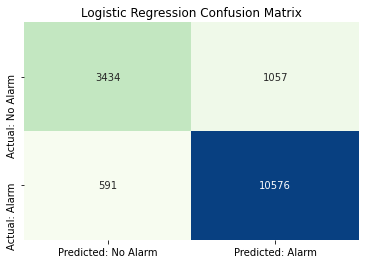

In [560]:
pcm(ytest, yhatlog, 'Logistic Regression')

In [623]:
storescore(ytest,yhatlog,'Logistic Regression','')

,Model,Accuracy Score,NoAlarm Accuracy,Alarm Accuracy,Complexity Parameter
1,Logistic Regression,0.8948,0.7646,0.9471,


#### KNN

In [609]:
smokeknn = KNeighborsClassifier()
params={'n_neighbors':[1,3,5,7,9,15]}
knngridcv = GridSearchCV(smokeknn,param_grid= params,scoring='accuracy')
knngridcv.fit(xtrain, ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 15]},
             scoring='accuracy')

In [610]:
knngridcv.best_params_
cp = 'K = ' + str(knngridcv.best_params_['n_neighbors'])
cp

'K = 1'

In [611]:
# Predicting the test dataset
yhatknn = knngridcv.predict(xtest)
print("Train accuracy :{:.5f}".format(skm.accuracy_score(ytrain, knngridcv.predict(xtrain))))
print("Test accuracy :{:.5f}".format(skm.accuracy_score(ytest, yhatknn)))

Train accuracy :1.00000
Test accuracy :0.99866


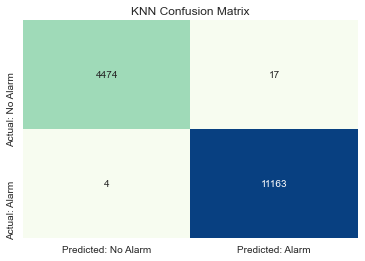

In [612]:
pcm(ytest, yhatknn, 'KNN')

In [624]:
storescore(ytest,yhatknn,'KNN',cp)

,Model,Accuracy Score,NoAlarm Accuracy,Alarm Accuracy,Complexity Parameter
1,Logistic Regression,0.8948,0.7646,0.9471,
2,KNN,0.9987,0.9962,0.9996,K = 1


#### Decision Tree

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

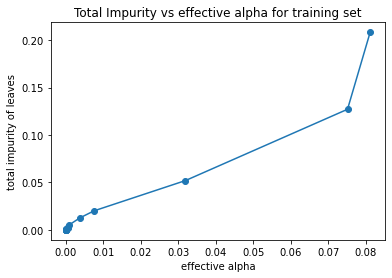

In [567]:
# Getting the best cost complexity parameter
smokedt = DecisionTreeClassifier(random_state=420)
path = smokepdt.cost_complexity_pruning_path(xtrain, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

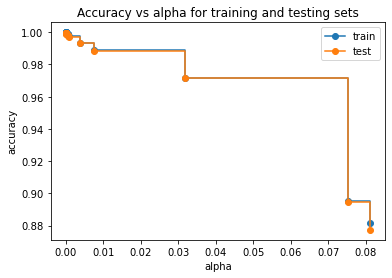

In [568]:
clfs = []
# Getting train and test errors for different alpha
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(xtrain, ytrain)
    clfs.append(clf)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(xtrain, ytrain) for clf in clfs]
test_scores = [clf.score(xtest, ytest) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

We can see the best accuracy for both train and test sets when Cost Complexity parameter is 0 

In [569]:
smokedt=DecisionTreeClassifier(random_state=420)
params = [{'ccp_alpha':[0.0]}]
dtgridcv = GridSearchCV(smokedt,param_grid=params, scoring = 'accuracy')
dtgridcv.fit(xtrain, ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=420),
             param_grid=[{'ccp_alpha': [0.0]}], scoring='accuracy')

In [570]:
dtgridcv.best_params_
bp = 'ccp_alpha = ' + str(dtgridcv.best_params_['ccp_alpha'])
bp

'ccp_alpha = 0.0'

In [571]:
# Predicting the test dataset
yhatdt = dtgridcv.predict(xtest)
print("Train accuracy :{:.5f}".format(skm.accuracy_score(ytrain, dtgridcv.predict(xtrain))))
print("Test accuracy :{:.5f}".format(skm.accuracy_score(ytest, yhatdt)))

Train accuracy :1.00000
Test accuracy :0.99943


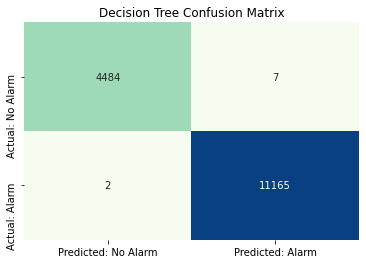

In [572]:
pcm(ytest, yhatdt, 'Decision Tree')

In [625]:
storescore(ytest,yhatdt,'Decision Tree','')

,Model,Accuracy Score,NoAlarm Accuracy,Alarm Accuracy,Complexity Parameter
1,Logistic Regression,0.8948,0.7646,0.9471,
2,KNN,0.9987,0.9962,0.9996,K = 1
3,Decision Tree,0.9994,0.9984,0.9998,


#### Random Forest

In [574]:
smokerf = RandomForestClassifier(oob_score = True, random_state = 420)
params = [{'n_estimators': [80,100], 
                         'criterion': ['gini'], 
                         'max_depth': [8,10,12]}]
rfgridcv = GridSearchCV(smokerf,param_grid=params, scoring = 'accuracy')
rfgridcv.fit(xtrain, ytrain)

GridSearchCV(estimator=RandomForestClassifier(oob_score=True, random_state=420),
             param_grid=[{'criterion': ['gini'], 'max_depth': [8, 10, 12],
                          'n_estimators': [80, 100]}],
             scoring='accuracy')

In [575]:
rfgridcv.best_params_
bp = 'Criterion = ' + str(rfgridcv.best_params_['criterion']) + ', max_depth = ' \
+ str(rfgridcv.best_params_['max_depth']) + ', n_estimators = ' + str(rfgridcv.best_params_['n_estimators'])
bp

'Criterion = gini, max_depth = 12, n_estimators = 80'

In [576]:
# Predicting the test dataset
yhatrf = rfgridcv.predict(xtest)
print("Train accuracy :{:.5f}".format(skm.accuracy_score(ytrain, rfgridcv.predict(xtrain))))
print("Test accuracy :{:.5f}".format(skm.accuracy_score(ytest, yhatknn)))

Train accuracy :1.00000
Test accuracy :0.99866


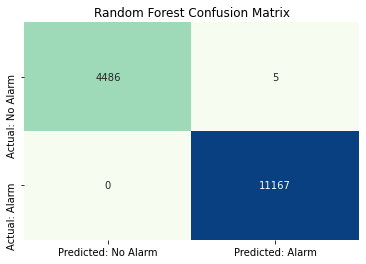

In [577]:
pcm(ytest, yhatrf, 'Random Forest')

In [626]:
storescore(ytest,yhatrf,'Random Forest','')

,Model,Accuracy Score,NoAlarm Accuracy,Alarm Accuracy,Complexity Parameter
1,Logistic Regression,0.8948,0.7646,0.9471,
2,KNN,0.9987,0.9962,0.9996,K = 1
3,Decision Tree,0.9994,0.9984,0.9998,
4,Random Forest,0.9997,0.9989,1.0000,


#### ADA Boost

In [585]:
smokeadb = AdaBoostClassifier(random_state = 420)
params = [{'n_estimators': [80,100], 
                         'learning_rate': [1,1.5]}]
adbgridcv = GridSearchCV(smokeadb,param_grid=params, scoring = 'accuracy')
adbgridcv.fit(xtrain, ytrain)

GridSearchCV(estimator=AdaBoostClassifier(random_state=420),
             param_grid=[{'learning_rate': [1, 1.5],
                          'n_estimators': [80, 100]}],
             scoring='accuracy')

In [586]:
adbgridcv.best_params_
bp = 'n_estimators = ' + str(adbgridcv.best_params_['n_estimators']) + ', learning_rate = ' + str(adbgridcv.best_params_['learning_rate'])
bp

'n_estimators = 80, learning_rate = 1.5'

In [587]:
# Predicting the test dataset
yhatadb = adbgridcv.predict(xtest)
print("Train accuracy :{:.5f}".format(skm.accuracy_score(ytrain, adbgridcv.predict(xtrain))))
print("Test accuracy :{:.5f}".format(skm.accuracy_score(ytest, yhatadb)))

Train accuracy :1.00000
Test accuracy :0.99943


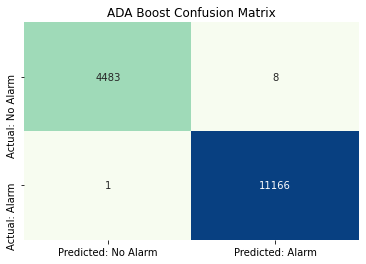

In [588]:
pcm(ytest, yhatadb, 'ADA Boost')

In [627]:
storescore(ytest,yhatadb,'ADA Boost','')

,Model,Accuracy Score,NoAlarm Accuracy,Alarm Accuracy,Complexity Parameter
1,Logistic Regression,0.8948,0.7646,0.9471,
2,KNN,0.9987,0.9962,0.9996,K = 1
3,Decision Tree,0.9994,0.9984,0.9998,
4,Random Forest,0.9997,0.9989,1.0000,
5,ADA Boost,0.9994,0.9982,0.9999,


#### Gradient Boost

In [599]:
smokegb = GradientBoostingClassifier(random_state = 420)
params = [{'n_estimators': [100,120], 
                         'learning_rate': [0.1,0.5,0.7]}]
gbgridcv = GridSearchCV(smokegb,param_grid=params, scoring = 'accuracy')
gbgridcv.fit(xtrain, ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=420),
             param_grid=[{'learning_rate': [0.1, 0.5, 0.7],
                          'n_estimators': [100, 120]}],
             scoring='accuracy')

In [600]:
gbgridcv.best_params_
bp = 'n_estimators = ' + str(gbgridcv.best_params_['n_estimators']) + ', learning_rate = ' + str(gbgridcv.best_params_['learning_rate'])
bp

'n_estimators = 120, learning_rate = 0.5'

In [597]:
# Predicting the test dataset
yhatgb = gbgridcv.predict(xtest)
print("Train accuracy :{:.5f}".format(skm.accuracy_score(ytrain, gbgridcv.predict(xtrain))))
print("Test accuracy :{:.5f}".format(skm.accuracy_score(ytest, yhatgb)))

Train accuracy :1.00000
Test accuracy :0.99974


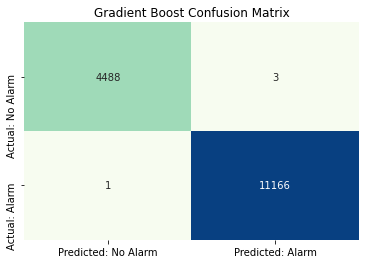

In [598]:
pcm(ytest, yhatgb, 'Gradient Boost')

In [628]:
storescore(ytest,yhatgb,'Gradient Boost','')

,Model,Accuracy Score,NoAlarm Accuracy,Alarm Accuracy,Complexity Parameter
1,Logistic Regression,0.8948,0.7646,0.9471,
2,KNN,0.9987,0.9962,0.9996,K = 1
3,Decision Tree,0.9994,0.9984,0.9998,
4,Random Forest,0.9997,0.9989,1.0000,
5,ADA Boost,0.9994,0.9982,0.9999,
6,Gradient Boost,0.9997,0.9993,0.9999,
